## Ultimate Pig

In [1]:
import random
import statistics as st
import matplotlib.pyplot as plt
import seaborn
% matplotlib inline

In [2]:
class Player:
    def __init__(self, num_rolls = 0):
        self.num_rolls = num_rolls
    
    def roll_die(self):
        return random.randint(1, 6)
    
    def turn(self):
        turn_score = 0
        num_rolls = self.num_rolls
        while num_rolls < 1:
            roll = self.roll_die()
            if roll != 1:
                turn_score += roll
                num_rolls += 1
            else:
                turn_score = 0
                num_rolls += 1
        return turn_score

In [54]:
class Player1(Player):    
    def turn(self):
        turn_score = 0
        num_rolls = 0
        while num_rolls < 4:
            roll = self.roll_die()
            if roll != 1:
                turn_score += roll
                num_rolls += 1
            else:
                turn_score = 0
                num_rolls = 3
        return turn_score
    

In [55]:
class Player2(Player):    
    def turn(self):
        turn_score = 0
        num_rolls = 0
        while turn_score < 20:
            roll = self.roll_die()
            if roll != 1:
                turn_score += roll
                #num_rolls += 1
            else:
                turn_score = 0
                #num_rolls = 3
        return turn_score

In [56]:
class Game:
    def __init__(self, player):
        self.player = player
        
    def play_game(self, player):
        turns = 0
        turn_score = []
        while turns < 7:
            turn_score.append(player.turn())
            turns += 1
        #return turn_score
        total_score = sum(turn_score)
        return total_score

In [105]:
player = Player()
game = Game(player)
player1 = Player1()
game1 = Game(player1)
player2 = Player2()
game2 = Game(player2)

In [114]:
Woody = [game.play_game(player) for _ in range(10000)]
Buzz = [game1.play_game(player1) for _ in range(10000)]
Bullseye = [game2.play_game(player2) for _ in range(10000)]

In [119]:
Woody_mean = st.mean(Woody)
Woody_stdev = st.stdev(Woody)
Buzz_mean = st.mean(Buzz)
Buzz_stdev = st.stdev(Buzz)
Bullseye_mean = st.mean(Bullseye)
Bullseye_stdev = st.stdev(Bullseye)

In [120]:
print(Woody_stdev)
print(Buzz_stdev)
print(Bullseye_stdev)

5.282252872547939
16.781296657342963
3.908927950445259


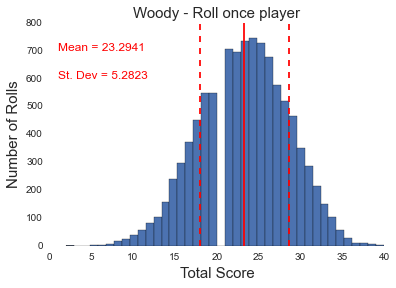

In [145]:
plt.hist(Woody, bins = 40)
plt.xlabel("Total Score", fontsize=15)
plt.ylabel("Number of Rolls", fontsize=15)
plt.title("Woody - Roll once player", fontsize=15)
ymin, ymax = plt.ylim()
plt.vlines(Woody_mean, ymin, ymax, color = "red", label = "Mean = {}".format(Woody_mean))
plt.vlines(Woody_mean - Woody_stdev, ymin, ymax, color = "red", linestyles = "dashed")
plt.vlines(Woody_mean + Woody_stdev, ymin, ymax, color = "red", linestyles = "dashed")
plt.text(1, 700, "Mean = {}".format(Woody_mean), color = "red", fontsize = 12)
plt.text(1, 600, "St. Dev = {:0.4f}".format(Woody_stdev), color = "red", fontsize = 12)
plt.show()

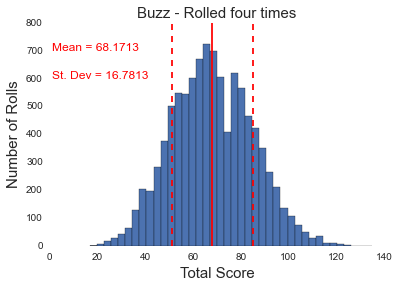

In [147]:
plt.hist(Buzz, bins = 40)
plt.xlabel("Total Score", fontsize=15)
plt.ylabel("Number of Rolls", fontsize=15)
plt.title("Buzz - Rolled four times", fontsize=15)
ymin, ymax = plt.ylim()
plt.vlines(Buzz_mean, ymin, ymax, color = "red", label = "Mean = {}".format(Buzz_mean))
plt.vlines(Buzz_mean - Buzz_stdev, ymin, ymax, color = "red", linestyles = "dashed")
plt.vlines(Buzz_mean + Buzz_stdev, ymin, ymax, color = "red", linestyles = "dashed")
plt.text(1, 700, "Mean = {}".format(Buzz_mean), color = "red", fontsize = 12)
plt.text(1, 600, "St. Dev = {:0.4f}".format(Buzz_stdev), color = "red", fontsize = 12)
plt.show()

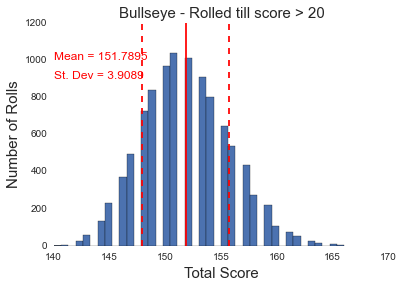

In [170]:
plt.hist(Bullseye, bins = 40)
plt.xlabel("Total Score", fontsize=15)
plt.ylabel("Number of Rolls", fontsize=15)
plt.title("Bullseye - Rolled till score > 20", fontsize=15)
ymin, ymax = plt.ylim()
plt.vlines(Bullseye_mean, ymin, ymax, color = "red", label = "Mean = {}".format(Bullseye_mean))
plt.vlines(Bullseye_mean - Bullseye_stdev, ymin, ymax, color = "red", linestyles = "dashed")
plt.vlines(Bullseye_mean + Bullseye_stdev, ymin, ymax, color = "red", linestyles = "dashed")
plt.text(140, 1000, "Mean = {}".format(Bullseye_mean), color = "red", fontsize = 12)
plt.text(140, 900, "St. Dev = {:0.4f}".format(Bullseye_stdev), color = "red", fontsize = 12)
plt.show()

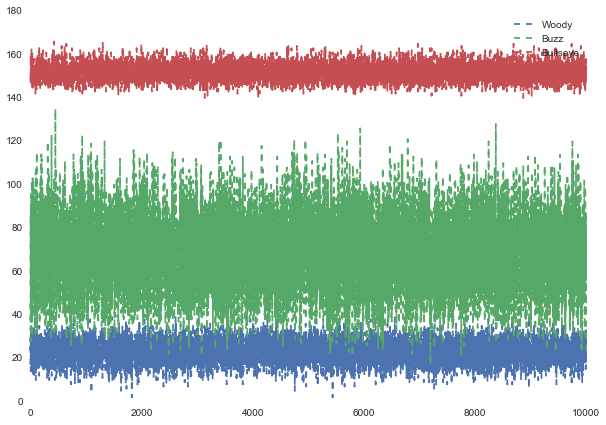

In [195]:
plt.figure(figsize=(10, 7))
plt.plot(Woody, label="Woody", linestyle='--')
plt.plot(Buzz, label="Buzz", linestyle='--')
plt.plot(Bullseye, label="Bullseye", linestyle='--')
xmin, xmax = plt.xlim()
plt.xlim(xmin - 20, xmax + 20)
plt.legend()
plt.show()

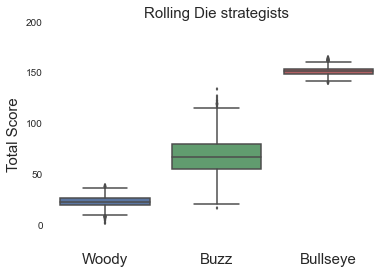

In [168]:
seaborn.boxplot([Woody, Buzz, Bullseye])
ymin, ymax = plt.ylim()
plt.ylim(ymin - 20, ymax + 20)
plt.title("Rolling Die strategists", fontsize=15)
plt.ylabel("Total Score", fontsize=15)
plt.xticks(range(1,4), ["Woody", "Buzz", "Bullseye"], fontsize=15)
plt.show()
